# All credits to Google tensorflow learn
https://www.tensorflow.org/tutorials/keras/basic_classification

# Data & Prerequisite

In [24]:
# Impoting all regular libraries, keras for dataset
# Matplot for looking how the data is processed
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# Loading the Fashion Data
# Train-Test split, load_data(), parameters can be changed to enhance the data taken
mnist_data = keras.datasets.fashion_mnist
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
(train_images, train_labels), (test_images, test_labels) = mnist_data.load_data()

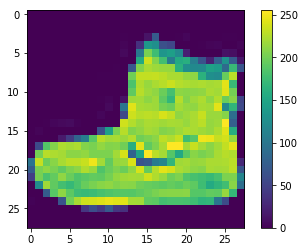

In [26]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [27]:
# Normalizing the images from 0-255 to 0-1 (float)
train_images = train_images / 255.0
test_images = test_images / 255.0

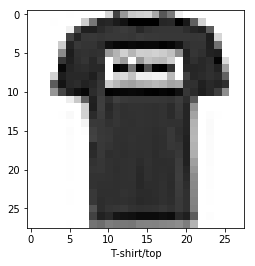

In [28]:
plt.figure()
plt.imshow(train_images[1], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[1]])

# The model

In [29]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # 28x28 2D-Matrix to 784 1D-vector
    keras.layers.Dense(128, activation=tf.nn.relu), 
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [30]:
model.compile(optimizer=tf.train.AdamOptimizer(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [31]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 20s 332us/step - loss: 0.4983 - acc: 0.8244
Epoch 2/5
60000/60000 [==============================] - 17s 291us/step - loss: 0.3744 - acc: 0.8647
Epoch 3/5
60000/60000 [==============================] - 17s 284us/step - loss: 0.3395 - acc: 0.8759
Epoch 4/5
60000/60000 [==============================] - 18s 292us/step - loss: 0.3124 - acc: 0.8844
Epoch 5/5
60000/60000 [==============================] - 18s 307us/step - loss: 0.2949 - acc: 0.8925


In [32]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test Accuracy : {}'.format(test_acc))

10000/10000 [==============================] - 2s 215us/step
Test Accuracy : 0.8726


In [33]:
prediction = model.predict(test_images)

In [34]:
np.argmax(prediction[0])

9

In [35]:
test_labels[0]

9

In [36]:
def plot_image(i, predict_arr, true_label, img):
    predict_arr, true_label, img = predict_arr[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    pred_label = np.argmax(predict_arr)
    if pred_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[pred_label],
                                        100*np.max(predict_arr),
                                        class_names[true_label],
                                        color=color))
def plot_value_arr(i, predict_arr, true_label):
    predict_arr, true_label = predict_arr[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predict_arr, color='#777777')
    plt.ylim([0, 1])
    pred_label = np.argmax(predict_arr)
    
    thisplot[pred_label].set_color('red')
    thisplot[true_label].set_color('blue')

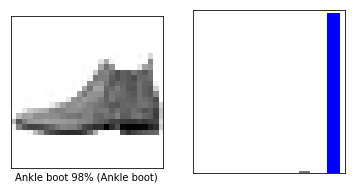

In [37]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1, 2, 1)
plot_image(i, prediction, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_arr(i, prediction, test_labels)

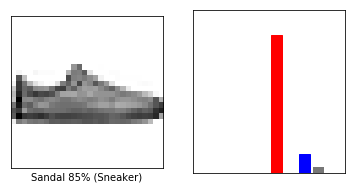

In [38]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1, 2, 1)
plot_image(i, prediction, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_arr(i, prediction, test_labels)

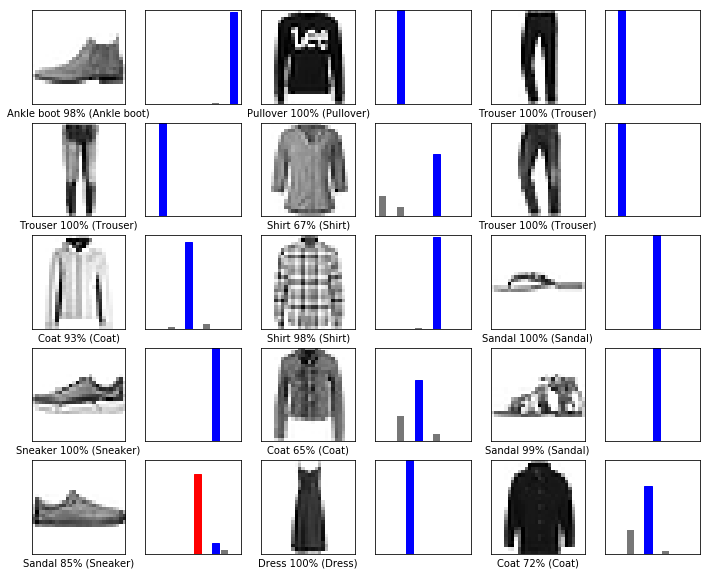

In [43]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, prediction, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_arr(i, prediction, test_labels)

In [44]:
img = test_images[0]
print(img.shape)

(28, 28)


In [45]:
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [46]:
pred_single = model.predict(img)
print(pred_single)

[[  6.25510847e-06   1.47660259e-07   1.59014007e-06   3.21659277e-09
    5.04397633e-07   3.23504070e-03   2.82983660e-06   1.35955168e-02
    4.28397725e-05   9.83115256e-01]]


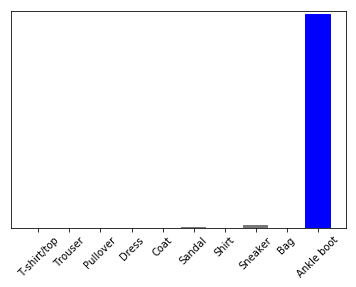

In [47]:
plot_value_arr(0, pred_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [48]:
np.argmax(pred_single[0])

9